# FIFA Players Position Categorization

Objective

In this part of the project we aim to use Machine Learning in order to create a model to predict football players position based on their physical attributes.

Background

Football is the most popular sport in the world. A recent FIFA (Fédération Internationale de Football Association) survey indicates that there are more than 300 Million football players around the world and an estimated fan base of over 3.5 Billion people.

A football match is played between 2 teams of eleven players, each one with an specific position. Since its invention the game has evolved to have more specialized roles for the different types of players, resulting on 25 different positions, however these can be grouped in 4 main categories. 

1.	Striker or Forward - whose main task is to score goal.
2.	Midfielders - who dispossess the opposition and keep possession of the ball to pass it to the forwards on their team.
3.	Defender - who specialize in preventing their opponents from scoring.
4.	Goalkeeper – who is an specific type of defenders in charge of secure the goal, the only position in this game who is allowed to touch the ball with its hands.


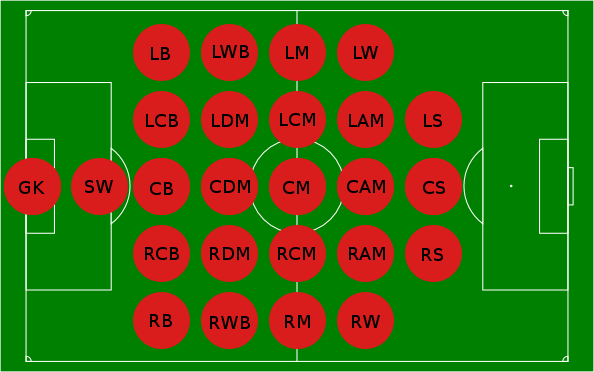


Data preparation

For this project we use a FIFA video game datasets which are available in Kaggle datasets (https://www.kaggle.com/karangadiya/fifa19). These data sets contain the categorical information that defines each of the FIFA Professional players position and a set of variables that represents their physical attributes. We’ve selected FIFA 2015 dataset, which contains over 14k records and more than 105 data elements, each one pertaining to an specific professional Football player in a CSV file.

We have filtered the information to keep only the data related to physical attributes (75 data elements) and 1 field containing the information of the player position in their current clubs, which will be used as the categorical variable. The data was prepared as below 

1.	Removing rows with null values on the player position field.
2.	Removing columns with non-numerical values from the physical attributes.
3.	Replacing null values with zeros in the physical attributes.

Model elaboration

For this project we will use a classifier model as we have categorical data. But before that we had to use Sklearn libraries to scale our data and encode our categorical variable (player position) to encode it from a string (“ST”, “GK”, etc) to numeric values.

For the first exercise we will use only 2 physical data attributes which are heavily correlated – Stamina and Strength – we will fit the model with these 2 variables as independent variables (X) in order to train a Keras Sequential model to predict the player position (dependent variable y) based on these 2 physical attributes.

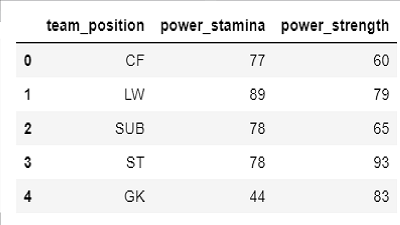


Using this configuration we had 22 diferent classes for the model, each one of the different player positon variants. After fiting the model with 1000 Epoch. The results were not as good as we expected as after validating the model with our testing data was the accuaracy obtained was 0.26

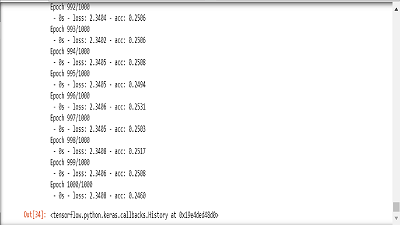


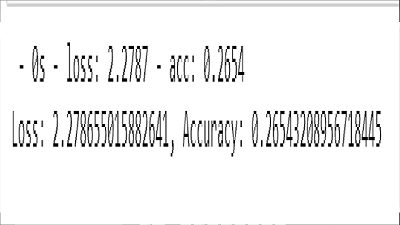


The results can be attributed to the significant number of classes, the 22 varainces of the main 4 positions categories with the limited number of physical attributes are leading the model to these results.

In order to prove this we decided to run the model with the same 2 independent variables, but in this ocasion we have grouped the 22 classes in to the 4 main positon categories, having only Striker, Deffender, Midfielder and GoalKepper.


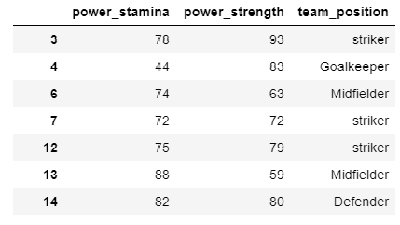


With this change and the same model configuration but changing the classes from 22 to 4 the results improved significantly resulting on an accuracy of 0.62.

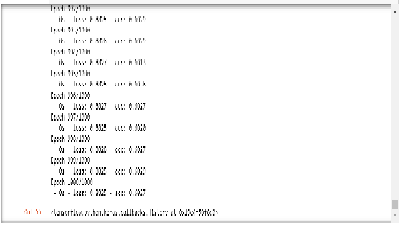


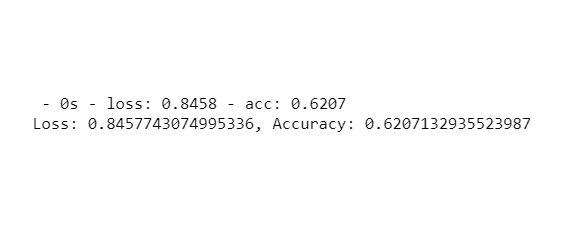


In order to improve the model we will increase the number of variables, from 2 to 75. Eeach one of this variable is more related to a specific position. i.e. an Striker would have more shooting power whereas a the defense skills are stronger on a Deffender.

After fiting the model whith the additional variables we can see a signficant improvemnet as the accuracy tested validated with the testing data resulted in 0.86.

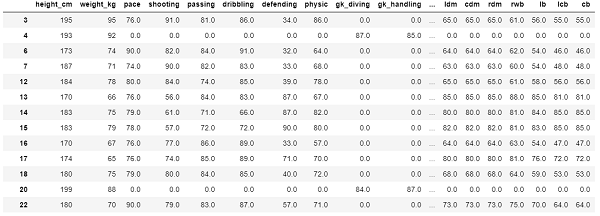

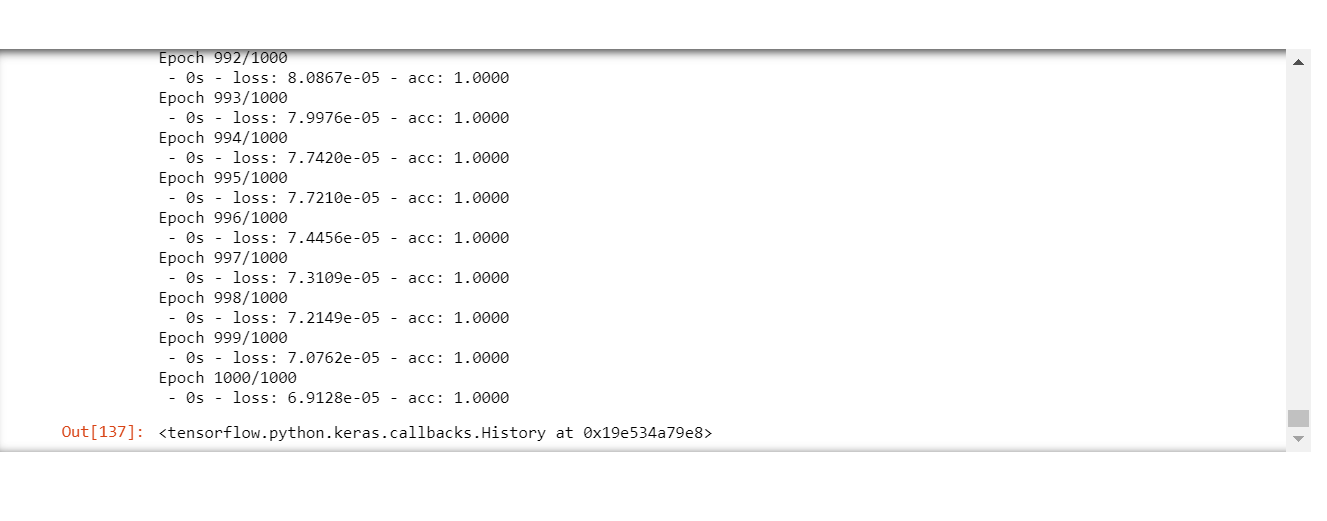

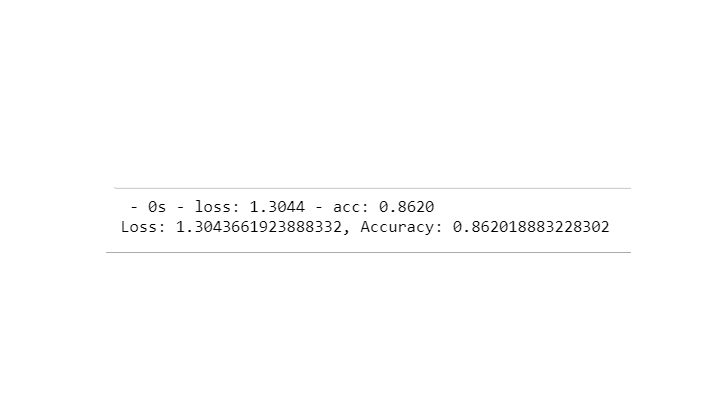


In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
import pandas as pd
seed(42)

In [4]:
#Reading Player Position, Stamina and Strength
dataset = pd.read_csv("datasets/players_15.csv",usecols = [24,62,63])

#fifa_stats_2015_df = dataset.iloc[dataset['team_position'], :] 
dataset.head()

,team_position,power_stamina,power_strength
0,CF,77,60
1,LW,89,79
2,SUB,78,65
3,ST,78,93
4,GK,44,83


In [8]:
#keeping only strikers, midfilders, defenders and goal kepers
positions = ['RCB','LCB','GK','LB','RB','RM','LM','ST','RCM','LCM','CAM','RDM','LDM','RS','LS',
             'CDM','CM','CB','LAM','RAM','LWB','RWB']
players_df = dataset[dataset['team_position'].isin(positions)]

players_df.head()

,team_position,power_stamina,power_strength
3,ST,78,93
4,GK,44,83
6,LM,74,63
7,RS,72,72
12,LS,75,79


In [10]:
#checking for null values 
print("Sum of NULL values in each column. ") 
print(players_df.isnull().sum()) 

Sum of NULL values in each column. 
team_position     0
power_stamina     0
power_strength    0
dtype: int64


In [11]:
#moving team_position to the end of the dataframe
cols_at_end = ['team_position']
players_df = players_df[[c for c in players_df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in players_df]]

In [14]:
#Selecting the independent and dependt variables and reshaping the arrays
X = players_df.iloc[:, :-1].values 
y = players_df.iloc[:, 2].values 

y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

(5832, 2)
(5832, 1)


In [17]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)


C:\Users\lsauc\Anaconda3\envs\PhytonData\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lsauc\Anaconda3\envs\PhytonData\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
#Encoded labels for player position string
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LM']
Encoded Label: 10
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['LS']
Encoded Label: 11
------------
Original Class: ['RCM']
Encoded Label: 16
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['CAM']
Encoded Label: 0
------------
Original Class: ['RCM']
Encoded Label: 16
------------
Original Class: ['CAM']
Encoded Label: 0
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['LDM']
Encoded Label: 9
------------
Original Class: ['LS']
Encoded Label: 11
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['CM']
Enco

Encoded Label: 16
------------
Original Class: ['CAM']
Encoded Label: 0
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['LM']
Encoded Label: 10
------------
Original Class: ['LDM']
Encoded Label: 9
------------
Original Class: ['RAM']
Encoded Label: 13
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LM']
Encoded Label: 10
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LM']
Encoded Label: 10
------------
Original Class: ['CDM']
Encoded Label: 2
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['LB']
Encoded Label: 6
-----------

------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['RCM']
Encoded Label: 16
------------
Original Class: ['RM']
Encoded Label: 18
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['RM']
Encoded Label: 18
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['CAM']
Encoded Label: 0
------------
Original Class: ['RM']
Encoded Label: 18
------------
Original Class: ['RM']
Encoded Label: 18
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['CB']
Encoded Label: 1
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class

------------
Original Class: ['CAM']
Encoded Label: 0
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['LDM']
Encoded Label: 9
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['LM']
Encoded Label: 10
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LDM']
Encoded Label: 9
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['

------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['CAM']
Encoded Label: 0
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['RM']
Encoded Label: 18
------------
Original Class: ['LDM']
Encoded Label: 9
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['CAM']
Encoded Label: 0
------------
Original Cl

Encoded Label: 10
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['RM']
Encoded Label: 18
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['LDM']
Encoded Label: 9
------------
Original Class: ['ST']
Encoded Label: 21
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['LS']
Encoded Label: 11
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['RAM']
Encoded Label: 13
------------
Original Class: ['LM']
Encoded Label: 10
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['RM']
Encoded Label: 18
----------

------------
Original Class: ['RCM']
Encoded Label: 16
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['CM']
Encoded Label: 3
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['CAM']
Encoded Label: 0
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['LS']
Encoded Label: 11
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['LDM']
Encoded Label: 9
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class

------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['RCM']
Encoded Label: 16
------------
Original Class: ['LM']
Encoded Label: 10
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LS']
Encoded Label: 11
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['CB']
Encoded Label: 1
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RB']

Original Class: ['GK']
Encoded Label: 4
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['CM']
Encoded Label: 3
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['RWB']
Encoded Label: 20
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['RCM']
Encoded Label: 16
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RS']
Encoded Label: 19
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['LCB']
Encoded Label: 7
------------
Original Class: ['RCB']
Encoded Label: 15
------------
Original Class: ['RM']
En

Original Class: ['LM']
Encoded Label: 10
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RM']
Encoded Label: 18
------------
Original Class: ['LDM']
Encoded Label: 9
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RWB']
Encoded Label: 20
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['RWB']
Encoded Label: 20
------------
Original Class: ['RCM']
Encoded Label: 16
------------
Original Class: ['RM']
Encoded Label: 18
------------
Original Class: ['RB']
Encoded Label: 14
------------
Original Class: ['RDM']
Encoded Label: 17
------------
Original Class: ['LB']
Encoded Label: 6
------------
Original Class: ['LCM']
Encoded Label: 8
------------
Original Class: ['LB']
Encod

In [25]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=1)

In [26]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

C:\Users\lsauc\Anaconda3\envs\PhytonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\lsauc\Anaconda3\envs\PhytonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\lsauc\Anaconda3\envs\PhytonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
#One_hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
#Creating the model, we will use a clasifier model for a our categorical data
#Creating a secuential model
from tensorflow.keras.models import Sequential

model = Sequential()


In [30]:
from tensorflow.keras.layers import Dense
number_inputs = 2
number_hidden_nodes = 3
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
#number of classes we want to predict is equal to 22 variations of the striker, midfielder, defender and goalkeper positions
number_classes = 22
model.add(Dense(units=number_classes, activation='softmax'))

In [32]:
#model sumary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                88        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Compiling the model
# Use categorical crossentropy for categorical data and mean squared error for regression
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
#Training the model
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 0s - loss: 3.0303 - acc: 0.1561
Epoch 2/1000
 - 0s - loss: 2.8967 - acc: 0.1603
Epoch 3/1000
 - 0s - loss: 2.7710 - acc: 0.1708
Epoch 4/1000
 - 0s - loss: 2.6589 - acc: 0.1914
Epoch 5/1000
 - 0s - loss: 2.5789 - acc: 0.2010
Epoch 6/1000
 - 0s - loss: 2.5222 - acc: 0.2135
Epoch 7/1000
 - 0s - loss: 2.4801 - acc: 0.2174
Epoch 8/1000
 - 0s - loss: 2.4487 - acc: 0.2215
Epoch 9/1000
 - 0s - loss: 2.4258 - acc: 0.2245
Epoch 10/1000
 - 0s - loss: 2.4100 - acc: 0.2314
Epoch 11/1000
 - 0s - loss: 2.3986 - acc: 0.2371
Epoch 12/1000
 - 0s - loss: 2.3903 - acc: 0.2421
Epoch 13/1000
 - 0s - loss: 2.3840 - acc: 0.2430
Epoch 14/1000
 - 0s - loss: 2.3795 - acc: 0.2449
Epoch 15/1000
 - 0s - loss: 2.3755 - acc: 0.2453
Epoch 16/1000
 - 0s - loss: 2.3725 - acc: 0.2444
Epoch 17/1000
 - 0s - loss: 2.3700 - acc: 0.2451
Epoch 18/1000
 - 0s - loss: 2.3678 - acc: 0.2437
Epoch 19/1000
 - 0s - loss: 2.3664 - acc: 0.2471
Epoch 20/1000
 - 0s - loss: 2.

Epoch 162/1000
 - 0s - loss: 2.3429 - acc: 0.2481
Epoch 163/1000
 - 0s - loss: 2.3430 - acc: 0.2453
Epoch 164/1000
 - 0s - loss: 2.3426 - acc: 0.2492
Epoch 165/1000
 - 0s - loss: 2.3426 - acc: 0.2526
Epoch 166/1000
 - 0s - loss: 2.3426 - acc: 0.2501
Epoch 167/1000
 - 0s - loss: 2.3426 - acc: 0.2471
Epoch 168/1000
 - 0s - loss: 2.3427 - acc: 0.2485
Epoch 169/1000
 - 0s - loss: 2.3426 - acc: 0.2513
Epoch 170/1000
 - 0s - loss: 2.3427 - acc: 0.2453
Epoch 171/1000
 - 0s - loss: 2.3428 - acc: 0.2449
Epoch 172/1000
 - 0s - loss: 2.3423 - acc: 0.2510
Epoch 173/1000
 - 0s - loss: 2.3426 - acc: 0.2499
Epoch 174/1000
 - 0s - loss: 2.3424 - acc: 0.2529
Epoch 175/1000
 - 0s - loss: 2.3425 - acc: 0.2471
Epoch 176/1000
 - 0s - loss: 2.3426 - acc: 0.2474
Epoch 177/1000
 - 0s - loss: 2.3425 - acc: 0.2549
Epoch 178/1000
 - 0s - loss: 2.3424 - acc: 0.2492
Epoch 179/1000
 - 0s - loss: 2.3423 - acc: 0.2490
Epoch 180/1000
 - 0s - loss: 2.3424 - acc: 0.2487
Epoch 181/1000
 - 0s - loss: 2.3422 - acc: 0.2540


Epoch 326/1000
 - 0s - loss: 2.3409 - acc: 0.2554
Epoch 327/1000
 - 0s - loss: 2.3408 - acc: 0.2492
Epoch 328/1000
 - 0s - loss: 2.3412 - acc: 0.2517
Epoch 329/1000
 - 0s - loss: 2.3409 - acc: 0.2531
Epoch 330/1000
 - 0s - loss: 2.3409 - acc: 0.2478
Epoch 331/1000
 - 0s - loss: 2.3410 - acc: 0.2497
Epoch 332/1000
 - 0s - loss: 2.3408 - acc: 0.2499
Epoch 333/1000
 - 0s - loss: 2.3412 - acc: 0.2519
Epoch 334/1000
 - 0s - loss: 2.3411 - acc: 0.2474
Epoch 335/1000
 - 0s - loss: 2.3412 - acc: 0.2494
Epoch 336/1000
 - 0s - loss: 2.3411 - acc: 0.2471
Epoch 337/1000
 - 0s - loss: 2.3415 - acc: 0.2430
Epoch 338/1000
 - 0s - loss: 2.3408 - acc: 0.2485
Epoch 339/1000
 - 0s - loss: 2.3408 - acc: 0.2501
Epoch 340/1000
 - 0s - loss: 2.3410 - acc: 0.2487
Epoch 341/1000
 - 0s - loss: 2.3411 - acc: 0.2467
Epoch 342/1000
 - 0s - loss: 2.3409 - acc: 0.2533
Epoch 343/1000
 - 0s - loss: 2.3408 - acc: 0.2503
Epoch 344/1000
 - 0s - loss: 2.3410 - acc: 0.2522
Epoch 345/1000
 - 0s - loss: 2.3411 - acc: 0.2513


Epoch 490/1000
 - 0s - loss: 2.3410 - acc: 0.2478
Epoch 491/1000
 - 0s - loss: 2.3408 - acc: 0.2519
Epoch 492/1000
 - 0s - loss: 2.3408 - acc: 0.2501
Epoch 493/1000
 - 0s - loss: 2.3411 - acc: 0.2556
Epoch 494/1000
 - 0s - loss: 2.3409 - acc: 0.2517
Epoch 495/1000
 - 0s - loss: 2.3408 - acc: 0.2540
Epoch 496/1000
 - 0s - loss: 2.3409 - acc: 0.2540
Epoch 497/1000
 - 0s - loss: 2.3407 - acc: 0.2522
Epoch 498/1000
 - 0s - loss: 2.3408 - acc: 0.2494
Epoch 499/1000
 - 0s - loss: 2.3410 - acc: 0.2506
Epoch 500/1000
 - 0s - loss: 2.3411 - acc: 0.2558
Epoch 501/1000
 - 0s - loss: 2.3406 - acc: 0.2551
Epoch 502/1000
 - 0s - loss: 2.3406 - acc: 0.2497
Epoch 503/1000
 - 0s - loss: 2.3413 - acc: 0.2494
Epoch 504/1000
 - 0s - loss: 2.3407 - acc: 0.2540
Epoch 505/1000
 - 0s - loss: 2.3411 - acc: 0.2494
Epoch 506/1000
 - 0s - loss: 2.3407 - acc: 0.2513
Epoch 507/1000
 - 0s - loss: 2.3407 - acc: 0.2531
Epoch 508/1000
 - 0s - loss: 2.3408 - acc: 0.2517
Epoch 509/1000
 - 0s - loss: 2.3409 - acc: 0.2510


Epoch 654/1000
 - 0s - loss: 2.3406 - acc: 0.2492
Epoch 655/1000
 - 0s - loss: 2.3405 - acc: 0.2510
Epoch 656/1000
 - 0s - loss: 2.3410 - acc: 0.2497
Epoch 657/1000
 - 0s - loss: 2.3409 - acc: 0.2501
Epoch 658/1000
 - 0s - loss: 2.3406 - acc: 0.2524
Epoch 659/1000
 - 0s - loss: 2.3405 - acc: 0.2538
Epoch 660/1000
 - 0s - loss: 2.3407 - acc: 0.2499
Epoch 661/1000
 - 0s - loss: 2.3408 - acc: 0.2485
Epoch 662/1000
 - 0s - loss: 2.3407 - acc: 0.2492
Epoch 663/1000
 - 0s - loss: 2.3409 - acc: 0.2517
Epoch 664/1000
 - 0s - loss: 2.3406 - acc: 0.2492
Epoch 665/1000
 - 0s - loss: 2.3404 - acc: 0.2506
Epoch 666/1000
 - 0s - loss: 2.3407 - acc: 0.2499
Epoch 667/1000
 - 0s - loss: 2.3406 - acc: 0.2513
Epoch 668/1000
 - 0s - loss: 2.3409 - acc: 0.2503
Epoch 669/1000
 - 0s - loss: 2.3408 - acc: 0.2588
Epoch 670/1000
 - 0s - loss: 2.3406 - acc: 0.2522
Epoch 671/1000
 - 0s - loss: 2.3406 - acc: 0.2519
Epoch 672/1000
 - 0s - loss: 2.3409 - acc: 0.2451
Epoch 673/1000
 - 0s - loss: 2.3407 - acc: 0.2474


Epoch 818/1000
 - 0s - loss: 2.3404 - acc: 0.2476
Epoch 819/1000
 - 0s - loss: 2.3404 - acc: 0.2455
Epoch 820/1000
 - 0s - loss: 2.3405 - acc: 0.2501
Epoch 821/1000
 - 0s - loss: 2.3406 - acc: 0.2540
Epoch 822/1000
 - 0s - loss: 2.3404 - acc: 0.2508
Epoch 823/1000
 - 0s - loss: 2.3406 - acc: 0.2492
Epoch 824/1000
 - 0s - loss: 2.3405 - acc: 0.2554
Epoch 825/1000
 - 0s - loss: 2.3403 - acc: 0.2506
Epoch 826/1000
 - 0s - loss: 2.3405 - acc: 0.2524
Epoch 827/1000
 - 0s - loss: 2.3405 - acc: 0.2483
Epoch 828/1000
 - 0s - loss: 2.3406 - acc: 0.2487
Epoch 829/1000
 - 0s - loss: 2.3407 - acc: 0.2469
Epoch 830/1000
 - 0s - loss: 2.3404 - acc: 0.2529
Epoch 831/1000
 - 0s - loss: 2.3406 - acc: 0.2524
Epoch 832/1000
 - 0s - loss: 2.3408 - acc: 0.2485
Epoch 833/1000
 - 0s - loss: 2.3403 - acc: 0.2535
Epoch 834/1000
 - 0s - loss: 2.3403 - acc: 0.2519
Epoch 835/1000
 - 0s - loss: 2.3405 - acc: 0.2519
Epoch 836/1000
 - 0s - loss: 2.3404 - acc: 0.2478
Epoch 837/1000
 - 0s - loss: 2.3405 - acc: 0.2513


Epoch 982/1000
 - 0s - loss: 2.3406 - acc: 0.2494
Epoch 983/1000
 - 0s - loss: 2.3404 - acc: 0.2529
Epoch 984/1000
 - 0s - loss: 2.3403 - acc: 0.2517
Epoch 985/1000
 - 0s - loss: 2.3404 - acc: 0.2515
Epoch 986/1000
 - 0s - loss: 2.3405 - acc: 0.2455
Epoch 987/1000
 - 0s - loss: 2.3403 - acc: 0.2515
Epoch 988/1000
 - 0s - loss: 2.3405 - acc: 0.2531
Epoch 989/1000
 - 0s - loss: 2.3404 - acc: 0.2513
Epoch 990/1000
 - 0s - loss: 2.3404 - acc: 0.2499
Epoch 991/1000
 - 0s - loss: 2.3404 - acc: 0.2469
Epoch 992/1000
 - 0s - loss: 2.3404 - acc: 0.2506
Epoch 993/1000
 - 0s - loss: 2.3402 - acc: 0.2506
Epoch 994/1000
 - 0s - loss: 2.3405 - acc: 0.2508
Epoch 995/1000
 - 0s - loss: 2.3405 - acc: 0.2494
Epoch 996/1000
 - 0s - loss: 2.3406 - acc: 0.2531
Epoch 997/1000
 - 0s - loss: 2.3405 - acc: 0.2503
Epoch 998/1000
 - 0s - loss: 2.3408 - acc: 0.2517
Epoch 999/1000
 - 0s - loss: 2.3406 - acc: 0.2508
Epoch 1000/1000
 - 0s - loss: 2.3408 - acc: 0.2460


In [35]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 2.2787 - acc: 0.2654
Loss: 2.278655015882641, Accuracy: 0.26543208956718445
